<a href="https://colab.research.google.com/github/shabnajL/Tweet_Emotion_Recognition/blob/main/Tweet_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
!pip install nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s eta 0:00:00


In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.13.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [7]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 11.1 MB/s eta 0:00:00


In [9]:
import datasets
dataset = datasets.load_dataset('emotion')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [10]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [13]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [14]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels

In [41]:
print(set(labels))

{0, 1, 2, 3, 4, 5}


In [16]:
tweets, labels = get_tweet(train) #collecting tweets and labels for the training set

In [18]:
tweets[0] , labels[0]


('i didnt feel humiliated', 0)

In [19]:

tweets[34] , labels[34]

('i can t imagine a real life scenario where i would be emotionally connected enough with someone to feel totally accepted and safe where it it morally acceptable for me to have close and prolonged physical contact and where sex won t be expected subsequently',
 1)

In [20]:
tweets[10] , labels[10]

('i feel like i have to make the suffering i m seeing mean something', 0)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [23]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [25]:
tweets[2] , labels[2] # examples of a tweet text

('im grabbing a minute to post i feel greedy wrong', 3)

In [26]:
tokenizer.texts_to_sequences([tweets[2]]) # tokenization of the tweet[2] text

[[17, 3060, 7, 1149, 5, 286, 2, 3, 495, 438]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

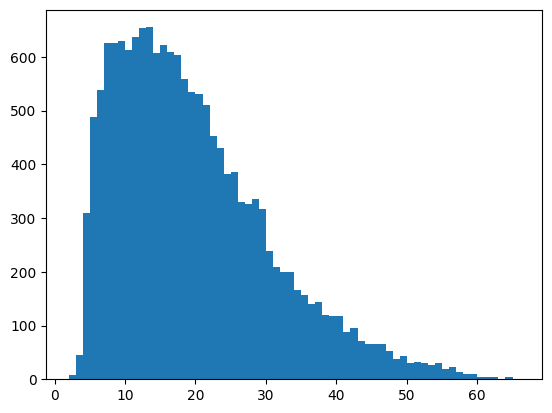

In [27]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins= len(set(lengths)))
plt.show()

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [32]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded_seq = pad_sequences(sequences, maxlen = 50, padding='post', truncating='post')
  return padded_seq

In [33]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [37]:
padded_train_seq[2]

array([  17, 3060,    7, 1149,    5,  286,    2,    3,  495,  438,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [38]:
classes = set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


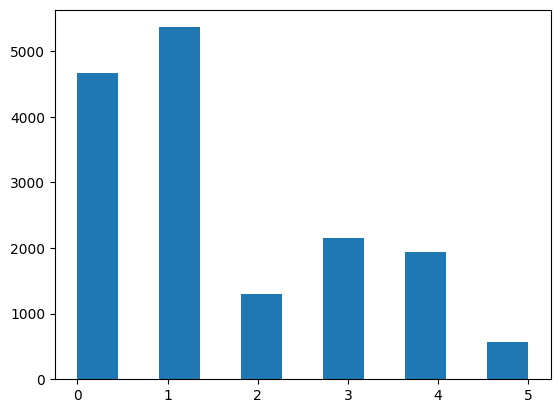

In [46]:
plt.hist(labels, bins = 11)
plt.show()

In [49]:
class_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())

In [50]:
class_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [51]:
index_to_class

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [53]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [55]:
train_labels = names_to_ids(labels)
print(train_labels[2])

3


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [58]:
maxlen = 50
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirection  (None, 50, 40)            5920      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175926 (687.21 KB)
Trainable params: 175926 (687.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [60]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [61]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [62]:
h = model.fit(
    padded_train_seq, train_labels, validation_data = (val_seq, val_labels),
    epochs=20,
    callbacks = [     # if for consecutive 2 epochs the accuracy does not change than the model training will stop
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20
500/500 [==============================] - 43s 62ms/step - loss: 1.3387 - accuracy: 0.4580 - val_loss: 0.7579 - val_accuracy: 0.7260
Epoch 2/20
500/500 [==============================] - 12s 25ms/step - loss: 0.5219 - accuracy: 0.8210 - val_loss: 0.4770 - val_accuracy: 0.8465
Epoch 3/20
500/500 [==============================] - 8s 17ms/step - loss: 0.2605 - accuracy: 0.9193 - val_loss: 0.3796 - val_accuracy: 0.8780
Epoch 4/20
500/500 [==============================] - 9s 18ms/step - loss: 0.1684 - accuracy: 0.9493 - val_loss: 0.4462 - val_accuracy: 0.8795
Epoch 5/20
500/500 [==============================] - 8s 17ms/step - loss: 0.1311 - accuracy: 0.9607 - val_loss: 0.3923 - val_accuracy: 0.8880
Epoch 6/20
500/500 [==============================] - 6s 13ms/step - loss: 0.1098 - accuracy: 0.9690 - val_loss: 0.4132 - val_accuracy: 0.8745
Epoch 7/20
500/500 [==============================] - 7s 15ms/step - loss: 0.1073 - accuracy: 0.9664 - val_loss: 0.4152 - val_accuracy: 0.88

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

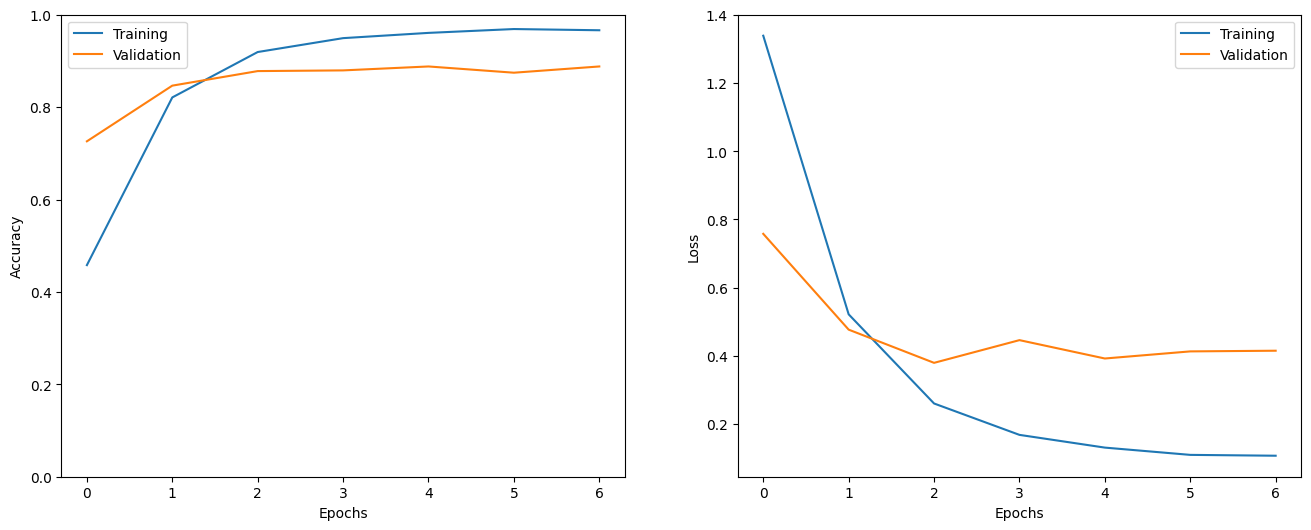

In [63]:
show_history(h)

In [64]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [66]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 1s 15ms/step - loss: 0.4313 - accuracy: 0.8775


In [68]:
i = random.randint(0, len(test_labels) - 1)

print("Sentence: ", test_tweets[i])
print("Emotions: ", index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion: ',pred_class)

Sentence:  i am feeling apprehensive about it but also wildly excited
Emotions:  4
1/1 [==============================] - 1s 1s/step
Predicted Emotion:  4


In [75]:
#preds = model.predict_classes(test_seq)
preds = np.argmax(model.predict(test_seq), axis=1)

63/63 [==============================] - 0s 5ms/step


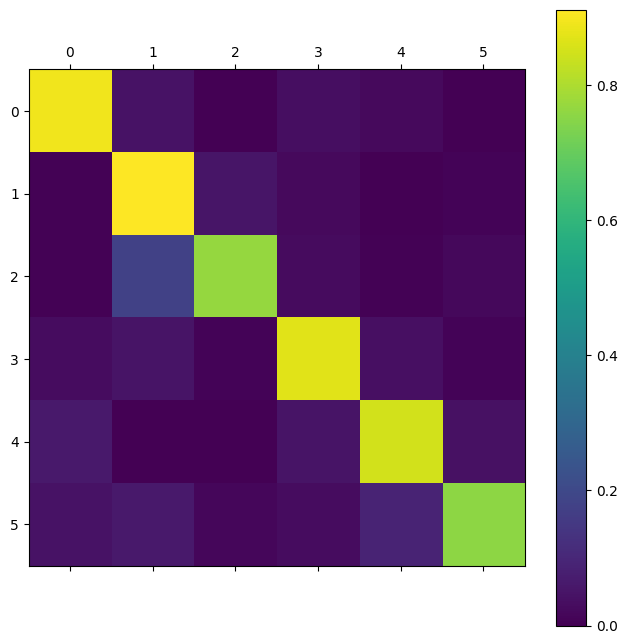

In [76]:
show_confusion_matrix(test_labels, preds, list(classes))